# Initialization

In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iyzico-datathon:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F67726%2F7547755%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D480eb4a2c10a098e825c89de0cbb85c67a15c4457a23c843700a8e1a24dcb57802580ff4d4ebee5627e7e7f6d648ba7602ee097545b3676747467e144db9803af5cb383c21868da802a55de0816b6e9018e6f7ad13dc078b086442d70cec1b0e1ac8e55e64acc79b2db18e1bf6ba138733e3344b43c89a88044f67aaadb14b5bebd7aca843c85b68d08e697bc1362257e836cd5f06bbf7241b666ff1b25da15fae9c6a26c307a68f38648ac83ad1bae7090adc0ed83d3d836298a993b08f4123246a781ada5d7885f70027ba64a08dde4ee191ed6eb29245a9532cdc4458f859e7dddf1b5708e171c4001faa55fa98a14ebb2ccc42f8710c2472d3591aba2f4b,fed-interest-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4352368%2F7477175%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2e6106803c34826d62df0a5c40c2dc8ea39f331ffcc2fd7484bc555d7e5ec5571d31da3dc82e9f9f3388aa325d43cef3bd7cc3c6ec46b6615b3157f25c531b41e7169a1b14184b01ab7e4f78da20191ef1b0f5c1f687a3c3faf59eddf17c7e84d8cf5a548b5e8c87e6c338cfddd7de0c763d9681ef2d30f7700069218ebe9a8ccf9bd96f227dc0dd1d008b0c2af8e1b20a01532f7058ce83a8c754ea05f32e5f148fd69ba831bb2c16785c5634ad39fd1da7321939d06607aeaa1594ad6b04b28ff362504b2816d06a6c553d285c022afee16dc69196cc2e0d43aa47e2164fa30373c1ab1d6fc508de2e21239df473ed14e019f7db48f0fe477d991991425336,enflasyon-tuik:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4353100%2F7478557%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4f03f7568dde91cc36032e429daa4c1ccf68dbba94f06d816cd9ec324ea1326adf69c0b03841e4ca76ac47fa21c47c32bbd97dad7fa2371859c0588502cbad11ccf5077a4f67e975298a1fd8c786ae7a05a7eb6ca8fa15ac9a943e345c80520c53c7be554000e4eb577a47f42a7fd1ffd856143d8202e3ec070da1864ff9121c0fd7bd6a390c974fb41c41663f43916778565b740ca47fbdc084926d4d8b06633e306ea8a6bb4cb280b7fc14725aec7d975935a12f393291f679c6902113022ded67145781c5bbf83b1205dd9e8d47b888b2c7c7f9c6e8fa5ba213945b3db0e6664fedcba809aec0619b97cbf15fc894f5668a93bc3dc5b53adbfac04aaccd1d,paid-employee-statistics:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4358964%2F7487212%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1cecf314e2408e1759e406a9f0a1978b7171ba65da9fa3e4e778339a55b959288c8f0c77ef9a9efa6b151e1f502d6d93ad924c3d6180d8173e8a64fa4146aed300a3d2567315af652d6da2374195440340c1998f4f40450c1685f3acc4464468f386394a145b0c0dfcf0662617a67dc9c68f231f5a67a535a0e8870cf17ee00c10fdcdaae742e8696b86ff5da600d84ac02850ff29ffe62c4e95e37873f419668902cbe97351aeb29ab6c5f116e894f6b3778a90c9bd5819af8cfe396dbb3d487749cf89d2256d882b44cbad956e4d9c072c9950cde9907102a9ecb762ca6041a0dd24322c58d7d57b657e77dd2a4de62ae67758e2fbaec920ae995cfc9942fe,confidence-index:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4362474%2F7492526%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da78300120743f7320a320029e2e4c3d494ada2509be81e51b86e33cb9ac7432bada84ed222f6b668c8846dbebafd2dfad9ec3c917caf5247215829618c11dcecf3cc27e3376c7c5ddd8150c2012083db6677de5432fc1b4ad7ff0b3eaead33b6015a00cd150dc57f2b1497b67e08c9a132ad29bd5e9f5f6e3b79834ca177dfb8b5672720e0855337bb283da659bd4e2d19d1a1e19d560bdb4eb7afd5afc514538d4a7c367a6cd05ccd66adc5fe764598f51e61efdf03141e71a94a5792ecbfff2ec80667eb24bb2171c2f799cce0e5d3d8abed0f741ced93123ecce52c92643466b2af7e96bb885532fd590f34031432906c486bde4e05f7b10e050e1e1eab0e,calendar:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4350428%2F7498257%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7fb3860b5d26ae5828f376f8fe5a457d2430f2e0519b803b59072a147b4e5cd5b61727fb5cf15fab5f4a66f011642831c95e7cefe4238040999cb2ecf5dcaeeec549d24ca1e1be7486f3d931a7df200bae8030e1aea44db741b199b19f0fe54bb5ca8103d9cb7766b1ed621fd4a2b6e55c26e82022f3bbcc06cde4a53c8d4c1eaa22e440c8c411a256927adebaf6ad301cbf0750ecd4fd45a72ab35a82248d14a88f6507f828f726923006c813ef23f9c3b8e2494e1969d04999346010d8348ec3226fdef75672f6306fcfd9b480af0d603b99f7d344dfa983c0c1ece5afdad9410769321af16c29c1da3f58e6ebef34b72a78abf89de19d4da33f9bfdcfaf97,usd-try-monthly:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4362111%2F7500904%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D09ca6224b80856a3a335076a7cf0ef53c3e17312271d9aacfd62f8cd8c6d32cb16b11c7fdd8ceb96813ded401de642ff067575380dbd6de72c10a9c2ed550b339b52a5c8410b04d4a975ea99ec7f2d028e1017549940a62b262e6e6c699391d8d7f0bcd5f53bc5d51e0759c6e835a0757471e0bb4a003e3e38c7780383e36ddf477bb9d81301c06d3e0d15d3ce0b04e9341296f8bb93071981a03f9cccd453e7b17228632a1bdb5695e4317850b0fce8ed631def400a5f3de64ac1eba5a9edcc1cb0267b97340fa3beb0ee477345cc2fd5c17c2f83860d1bb0447237b01ff8a2d48c52f44c83b8dd25dc239ac4235a7614d31e43861cb17e2a11645a821b81f9,bist100:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4362163%2F7500923%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D32eaf1b81fef02151661a33d99de2ba461b316bff27127c540265cc28d7b4e1c1c27cbca28c1563280739a658c85e98d8e08cce3215acf1f60a5bc8c3eb1c4370745a80487918e9cd6e4cd8a06282ab99697fd9f68a3a4cbdec2f895306b151ffbe6aa070efa0975ae1ff57000b89e96a2ce61c9881b5d9dfa295d921950f545446f997b40c5288065b0027967fdb301039d76288c7dc78e69845f22523eb243699f843944ab896222d9426f4f167f7c318e72fbf624d9079d902d0be5b0d4e9e6db7a30a3f18a8e7fcb779120581a4f307feb2f9635ca2165abc616e56e678fd0969203af84be580d8017197726974c65432cbc63f354491d7ac9c34c0f2fcf,euro-try-monthly:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4362154%2F7501049%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T175727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D75824075b2340b5dae864b6adb7e468890edecdcd67bc83e6322383f34b1c540d5e6a98cc5b01997c69bd024f3adc4dc217b77307b1cdde73318c4ad130740aad4da633f65a23469e49dd4c77cb612e6c4ebb7df963bd78fb299d825eaae69f8f6934f190db5970f379d6bc6239bc5397c4f29f63a18cddbc3634db618c9932712a4bed14b5ca483a172aa9fd6a53f83a767e76640cc5eccb1ac548d25d1647cdb47550c484493b2b14914578b66af6d0f86174f9698fb634be2fad38c927359250c56d326dcc4d08587e48ebb2dc8b9ac49d53136c1d6c8caafbeeeb933ddd105d16a8864e25436d2d7c28537fcc68ecf4d18c2b375d0ea41b57339866f2cee'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1738873 bytes downloaded
Downloaded and uncompressed: iyzico-datathon
[==================================================] 415 bytes downloaded
Downloaded and uncompressed: fed-interest-csv
[==================================================] 561 bytes downloaded
Downloaded and uncompressed: enflasyon-tuik
[==================================================] 57143 bytes downloaded
Downloaded and uncompressed: paid-employee-statistics
[==================================================] 30656 bytes downloaded
Downloaded and uncompressed: confidence-index
[==================================================] 364 bytes downloaded
Downloaded and uncompressed: calendar
[==================================================] 1185 bytes downloaded
Downloaded and uncompressed: usd-try-monthly
[==================================================] 1559 bytes downloaded
Downloaded and uncompressed: bist100
[==========================================

In [6]:
import numpy as np
import pandas as pd # pandas who?
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)),

/kaggle/input/calendar/calendar.csv
/kaggle/input/paid-employee-statistics/paid-employee-statistics-merged.csv
/kaggle/input/paid-employee-statistics/seperated/programming-and-broadcasting.csv
/kaggle/input/paid-employee-statistics/seperated/financial-and-insurance.csv
/kaggle/input/paid-employee-statistics/seperated/information-and-communication.csv
/kaggle/input/paid-employee-statistics/seperated/office-and-business-support-servies.csv
/kaggle/input/paid-employee-statistics/seperated/building-and-landscape-services.csv
/kaggle/input/paid-employee-statistics/seperated/food-and-beverage.csv
/kaggle/input/paid-employee-statistics/seperated/warehousing--support-activities-4-transportations.csv
/kaggle/input/paid-employee-statistics/seperated/travel-agency-and-related-services.csv
/kaggle/input/paid-employee-statistics/seperated/advertising-and-market-research.csv
/kaggle/input/paid-employee-statistics/seperated/computer-programming-consultancy-and-related.csv
/kaggle/input/paid-employee-

### **Dosya açıklamaları**
- train.csv - training veri seti
- sample_submission.csv - doğru formatta örnek submission dosyası

Train veri seti 2020 yılının başından 2023 Eylül ayına kadar ay bazlı olarak iş yerlerinin geçirdiği işlem sayısını içermektedir. Test dosyası oluşturulmamıştır, katılımcılar train içerisinde istedikleri şekilde ve formatta test verisi ayırabilirler. Kapsamda hedeflenen 2023 son çeyrek (Ekim - Kasım - Aralık) ayları için merchant bazında işlem sayılarının (**net_payment_cnt**) tahmin edilmesi ve submit edilmesidir.
- **merchant_id** Maskelenmiş iş yeri ID'si
- **month_id** İşlemin yapıldığı ay (YYYYMM formatında)
- **merchant_source** İş yerinin iyzico’ya katıldığı kaynak
- **settlement_period** İş yerinin hak edişini alış sıklığı   
- **working_type** İş yerinin tipini gösterir
- **mcc_id** İş yerinin satış yaptığı kategori bilgisini gösterir
- **merchant_segment** İş yerinin iyzico içerisinde bulunduğu segmenti gösterir
- **net_payment_cnt** İş yerinin ilgili ay içerisinde geçirdiği net (ödeme - iptal - iade) işlem sayısıdır

### Submission Dosyası

- **id** Tahminlenmesi beklenen ay ve maskelenmiş müşteri ID'si (Örn: **202312merchant_36004**)
- **net_payment_cnt** İş yerinin ilgili ay geçirdiği işlem sayısı

### Dış Veri Kullanımı

Dönemsel enflasyon verisi, maaş ödenme günleri, (SGK ve devlet memurlarının maaş günleri vb…), resmi ve dini bayramlara ilişkin veriler, döviz kurları, mevsime göre ülkemizde görülen ortalama sıcaklık verileri gibi modelin kurulumunda size faydalı olabileceğini düşündüğünüz her türlü dış veriyi kullanabilirsiniz.


# 1. Reading dataset

In [7]:
train_path = '/kaggle/input/iyzico-datathon/train.csv'
calendar_path = "/kaggle/input/calendar/calendar.csv"
fed_path = "/kaggle/input/fed-interest-csv/DFF (2).csv"
tuik_enflasyon_path = "/kaggle/input/enflasyon-tuik/enflasyon.csv"
tuik_paid_employee_statistics_path = '/kaggle/input/paid-employee-statistics/paid-employee-statistics-merged.csv'
tuik_confidence_index_path = '/kaggle/input/confidence-index/confidence-index-merged.csv'
usd_try_path = "/kaggle/input/usd-try-monthly/usd_try.csv"
euro_try_path = "/kaggle/input/euro-try-monthly/eur_try.csv"
bist100_path = "/kaggle/input/bist100/bist100.csv"
submission_path = "/kaggle/input/iyzico-datathon/sample_submission.csv"

df = pd.read_csv(train_path)
calendar = pd.read_csv(calendar_path)
fed=pd.read_csv(fed_path)
tuik_enflasyon = pd.read_csv(tuik_enflasyon_path)
tuik_paid_employee_statistics = pd.read_csv(tuik_paid_employee_statistics_path)
usd_try = pd.read_csv(usd_try_path)
euro_try = pd.read_csv(euro_try_path)
bist100 = pd.read_csv(bist100_path)
tuik_ci = pd.read_csv(tuik_confidence_index_path)
submission = pd.read_csv(submission_path)


In [8]:
df_copy = df.copy()
submission['merchant_id'] = submission['id'].astype(str).str[6:]
submission['month_id'] = submission['id'].astype(str).str[:6]
df_copy.drop(columns=['month_id','net_payment_count'],inplace=True)
submission = submission.merge(df_copy,on='merchant_id',how='left').drop_duplicates().reset_index(drop=True)
submission.drop(columns=['id'],inplace=True)
submission.to_csv('test.csv',index=False)

In [9]:
def year_seperater(values):
    return str(values)[:4] # take first four digit
def month_seperater(value):
    return str(value)[-2:] # take last two digit
def get_numerical_merchant_id(value):
    return int(value.split('_')[1])
def get_string_merchant_id(value):
    return 'merchant_' + str(value)

In [10]:
test = pd.read_csv("test.csv")

# seperating month_id columns as month and year
test['year'] = test['month_id'].apply(year_seperater).astype("int")
test["month"] = test["month_id"].apply(month_seperater).astype("int")
test['merchant_id'] = test['merchant_id'].apply(get_numerical_merchant_id).astype("int")

# mapping merchant_source_name
map_merchant_source_name = {"Merchant Source - 3" : 3,
                           "Merchant Source - 2" : 2,
                           "Merchant Source - 1": 1}
test["merchant_source_name"] = test["merchant_source_name"].map(map_merchant_source_name)

# mapping settlement_period
map_settlement_period = {"Settlement Period - 3" : 3,
                           "Settlement Period - 2" : 2,
                           "Settlement Period - 1": 1}
test["settlement_period"] = test["settlement_period"].map(map_settlement_period)

# mapping working_type
map_working_type = {"Working Type - 6" : 6,
                   "Working Type - 5":5,
                   "Working Type - 4":4,
                   "Working Type - 3":3,
                   "Working Type - 2":2,
                   "Working Type - 1":1}
test["working_type"] =test["working_type"].map(map_working_type)

map_merchant_segment = {'Segment - 4':4,
                       'Segment - 3':3,
                       'Segment - 2':2,
                       'Segment - 1':1}
test["merchant_segment"] =test["merchant_segment"].map(map_merchant_segment)
test['mcc_id'], unique_mcc_ids_test = pd.factorize(test['mcc_id'])
test

,net_payment_count,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,year,month
0,0,36004,202311,1,1,2,0,4,2023,11
1,0,36004,202312,1,1,2,0,4,2023,12
2,0,36004,202310,1,1,2,0,4,2023,10
3,0,23099,202311,1,1,5,1,4,2023,11
4,0,23099,202312,1,1,5,1,4,2023,12
...,...,...,...,...,...,...,...,...,...,...
78175,0,35969,202312,1,1,6,6,4,2023,12
78176,0,35969,202310,1,1,6,6,4,2023,10
78177,0,8429,202311,1,1,5,11,4,2023,11
78178,0,8429,202312,1,1,5,11,4,2023,12


## 2. Data preprocessing

In [11]:
def year_seperater(values):
    return str(values)[:4] # take first four digit
def month_seperater(value):
    return str(value)[-2:] # take last two digit
def get_numerical_merchant_id(value):
    return int(value.split('_')[1])
def get_string_merchant_id(value):
    return 'merchant_' + str(value)

In [12]:
# seperating month_id columns as month and year
df['year'] = df['month_id'].apply(year_seperater).astype("int")
df["month"] = df["month_id"].apply(month_seperater).astype("int")
df['merchant_id'] = df['merchant_id'].apply(get_numerical_merchant_id).astype("int")

In [13]:
# mapping merchant_source_name
map_merchant_source_name = {"Merchant Source - 3" : 3,
                           "Merchant Source - 2" : 2,
                           "Merchant Source - 1": 1}
df["merchant_source_name"] = df["merchant_source_name"].map(map_merchant_source_name)

In [14]:
# mapping settlement_period
map_settlement_period = {"Settlement Period - 3" : 3,
                           "Settlement Period - 2" : 2,
                           "Settlement Period - 1": 1}
df["settlement_period"] = df["settlement_period"].map(map_settlement_period)

In [15]:
# mapping working_type
map_working_type = {"Working Type - 6" : 6,
                   "Working Type - 5":5,
                   "Working Type - 4":4,
                   "Working Type - 3":3,
                   "Working Type - 2":2,
                   "Working Type - 1":1}
df["working_type"] =df["working_type"].map(map_working_type)

In [16]:
map_merchant_segment = {'Segment - 4':4,
                       'Segment - 3':3,
                       'Segment - 2':2,
                       'Segment - 1':1}
df["merchant_segment"] =df["merchant_segment"].map(map_merchant_segment)

In [17]:
df['mcc_id'], unique_mcc_ids = pd.factorize(df['mcc_id'])

## 2a. Calendar data

In [18]:
# seperating CALENDAR_DATE columns as month and year
calendar['year'] = calendar['CALENDAR_DATE'].apply(year_seperater).astype("int")
calendar["month"] = calendar["CALENDAR_DATE"].apply(month_seperater).astype("int")

In [19]:
calendar = calendar.drop(["CALENDAR_DATE"],axis=1) #dropping date values

In [20]:
# mapping the values.
map_no_yes = {"N" : 0,  #0 -> N
             "Y":1}     #1 -> Y
calendar["RAMADAN_FLAG"]=calendar["RAMADAN_FLAG"].map(map_no_yes)
calendar["NATIONAL_HOLIDAY_FLAG"]=calendar["NATIONAL_HOLIDAY_FLAG"].map(map_no_yes)

## 2b. Fed Data

In [21]:
# fed data mapping
map_state_fed = {"Pozitif" : 2,
                "Nötr" : 1,
                "Negatif":0}
fed["state"] = fed["state"].map(map_state_fed)

## 2c. TUIK enflasyon dataset

In [22]:
# good to go

## 2d. TUIK Paid Employee Statistics (Ücretli çalışan istatistikleri)

In [23]:
# good to go

## 2e. USD_TRY

In [24]:
def year_seperater_usd(values):
    return str(values)[6:] # take first four digit
def month_seperater_usd(value):
    return str(value)[3:5] # take last two digit
def convert_to_float_bist100(value):
    try:
        return float(value.replace('.', '').replace(',','.'))
    except ValueError:
        return float('nan')

In [25]:
usd_try['year'] = usd_try['Date'].apply(year_seperater_usd).astype("int")
usd_try['month'] = usd_try['Date'].apply(month_seperater_usd).astype("int")
usd_try.drop(["Date"],axis=1,inplace=True)
usd_try.drop(["Change %"],axis=1 ,inplace=True)

In [26]:
for col in usd_try.columns:
    if col not in ['year', 'month']:
        usd_try[col] = usd_try[col].str.replace(',', '.').astype("float")

usd_try.dtypes
# TODO: refactor into a function

Price    float64
Open     float64
High     float64
Low      float64
year       int64
month      int64
dtype: object

## 2f. euro_try

In [27]:
euro_try['year'] = euro_try['Date'].apply(year_seperater_usd).astype("int")
euro_try['month'] = euro_try['Date'].apply(month_seperater_usd).astype("int")
euro_try.drop(["Date"],axis=1,inplace=True)
euro_try.drop(["Change %"],axis=1 ,inplace=True)

In [28]:
for col in euro_try.columns:
    if col not in ['year', 'month']:
        euro_try[col] = euro_try[col].str.replace(',', '.').astype("float")

euro_try.dtypes
#TODO: refactor into a function

Price    float64
Open     float64
High     float64
Low      float64
year       int64
month      int64
dtype: object

## 2g. bist100


In [29]:
bist100['year'] = bist100['Date'].apply(year_seperater_usd).astype("int")
bist100['month'] = bist100['Date'].apply(month_seperater_usd).astype("int")
bist100.drop(["Date"],axis=1,inplace=True)
bist100.drop(["Change %"],axis=1 ,inplace=True)
bist100.drop(["Volume"],axis=1,inplace=True)

In [30]:
numerical_columns = ['Price', 'Open', 'High', 'Low']
bist100[numerical_columns] = bist100[numerical_columns].applymap(convert_to_float_bist100)

In [31]:
df.month = df.month.astype("int")
df.year = df.year.astype("int")

## 2h. Confidence Index

In [32]:
# good to go

#  Model Preperation
This is where we can choose what features do we want to use in training.



In [33]:
df = pd.merge(df, calendar, on=["year","month"])
df = pd.merge(df,fed,on=["month","year"])
df = pd.merge(df,tuik_enflasyon,on=["month","year"])
df = pd.merge(df,usd_try,on=["month","year"])
df = pd.merge(df,euro_try,on=["month","year"])
df = pd.merge(df,bist100,on=["month","year"])
# df = pd.merge(df,tuik_ci, on=["month","year"])
# df = pd.merge(df, tuik_paid_employee_statistics, on=["month","year"])

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2), format='%Y-%m')
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

In [34]:
test = pd.merge(test,calendar,on=["month","year"], how="left")
test = pd.merge(test,fed,on=["month","year"], how="left")
test = pd.merge(test,tuik_enflasyon,on=["month","year"],how="left")
test = pd.merge(test,usd_try,on=["month","year"], how="left")
test = pd.merge(test,euro_try,on=["month","year"], how="left")
test = pd.merge(test,bist100,on=["month","year"], how="left")
# test = pd.merge(test,tuik_ci,on=["month","year"], how="left")
# test = pd.merge(test, tuik_paid_employee_statistics, on=["month","year"], how="left")

In [35]:
tester = pd.merge(df, test, how='right')
allIn = pd.merge(df,tester,how='outer')
merchant_ids = tester['merchant_id'].unique()

In [36]:
# HELPER FUNCTIONS
global RECENT_PAYMENTS_THRESHOLD
global ENOUGH_DATA_THRESHOLD
global HIGHER_MODEL_TRESHOLD
global ENOUGH_LAST_PAYMENT_TRESHOLD

RECENT_PAYMENTS_THRESHOLD = 2
ENOUGH_DATA_THRESHOLD = 4
HIGHER_MODEL_TRESHOLD = 20
ENOUGH_LAST_PAYMENT_TRESHOLD = 3

def filter_df(data):
    length = len(data)
    last_payments_len = len(data[data['month_id'] > (202309 - RECENT_PAYMENTS_THRESHOLD)])
    enough_last_payment = len(data[(data['month_id'] < 2023010) & (data['month_id'] > 202303)])

    if length < ENOUGH_DATA_THRESHOLD:
        return 'NOT_ENOUGH_DATA'
    elif last_payments_len == 0 or enough_last_payment < ENOUGH_LAST_PAYMENT_TRESHOLD:
        return 'NO_RECENT_PAYMENTS'
    elif length > HIGHER_MODEL_TRESHOLD:
      return 'CAT_T'
    else:
      return 'CAT_F'

def round_df(df):
    dfc = df.copy()
    dfc['net_payment_count'] = df['net_payment_count'].round().astype(int)
    return dfc

def df_loop_concat(result, sub):
    result = round_df(result)
    result = result[(result['month'] > 9) & (result['year'] == 2023)]
    result = pd.merge(tester, result[(result['month'] > 9) & (result['year'] == 2023)],how='right')
    result [result ['merchant_id'] == merchant_id][['merchant_id', 'year', 'month', 'net_payment_count']]
    sub = pd.concat([sub,result], ignore_index=True)
    return sub

def create_submission(df):
  suba = df.copy()
  suba = suba[['year','month','merchant_id','net_payment_count']]
  suba['id'] = suba['year'].astype(str) + '' + suba['month'].astype(str) + 'merchant_' + suba['merchant_id'].astype(str)
  subb = suba[['id','net_payment_count']]
  subb.to_csv('submission.csv', index=False)

def get_merchant_df(merchant_id):
  return df[df['merchant_id'] == merchant_id]

def get_merchant_all(merchant_id):
  return allIn[allIn['merchant_id'] == merchant_id]


In [37]:
def get_payment_prediction_df(merchant_id):
  mc = get_merchant_df(merchant_id)

  datetime_index = pd.date_range(start='2020-01-01', end='2023-09-01', freq='MS')
  sample_row = mc.head(1)

  for index in datetime_index:
      if index not in mc.index:
          new_row = pd.DataFrame({
              'merchant_id': [sample_row['merchant_id'].iloc[0]],
              'month_id': [index.year * 100 + index.month],
              'merchant_source_name': [sample_row['merchant_source_name'].iloc[0]],
              'settlement_period': [sample_row['settlement_period'].iloc[0]],
              'working_type': [sample_row['working_type'].iloc[0]],
              'mcc_id': [sample_row['mcc_id'].iloc[0]],
              'merchant_segment': [sample_row['merchant_segment'].iloc[0]],
              'net_payment_count': [0],
              'year': [index.year],
              'month': [index.month]
          })


          new_row.index = pd.to_datetime([index])
          mc = pd.concat([mc, new_row])
  mc.sort_index(inplace=True)

  cal = pd.date_range(start='2020-10-01', end='2023-09-01', freq='MS')
  desired_row = mc.loc[['2020-10-01']]
  desired_row

  for i in range(-1, -10, -1):
      column_name = f'npc_{i}'
      mc.loc[:, column_name] = 0
  for i in range(1, 10):
      column_name = f'npcc_{i}'
      mc.loc[:, column_name] = 0

  for i in list(range(10, 46)):
    for j in list(range(2, 11)):
      net_payment_count_value = mc.at[mc.index[i-1], 'net_payment_count']
      sum = net_payment_count_value
      for k in list(range(1,j)):
        sum += mc.at[mc.index[i-1-k], 'net_payment_count']
      mc.at[mc.index[i-1], f'npcc_{j-1}'] = sum
    for j in list(range(1, 10)):
      it_row = mc.iloc[(i-1-j):(i-j), :]
      mc.at[mc.index[i-1], f'npc_-{j}'] = it_row['net_payment_count']

  mc_cut = mc.iloc[9:]
  return mc_cut

In [38]:
def get_payment_prediction_all_df(merchant_id):
  mc = get_merchant_df(merchant_id)

  datetime_index = pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS')
  sample_row = mc.head(1)

  for index in datetime_index:
      if index not in mc.index:
          new_row = pd.DataFrame({
              'merchant_id': [sample_row['merchant_id'].iloc[0]],
              'month_id': [index.year * 100 + index.month],
              'merchant_source_name': [sample_row['merchant_source_name'].iloc[0]],
              'settlement_period': [sample_row['settlement_period'].iloc[0]],
              'working_type': [sample_row['working_type'].iloc[0]],
              'mcc_id': [sample_row['mcc_id'].iloc[0]],
              'merchant_segment': [sample_row['merchant_segment'].iloc[0]],
              'net_payment_count': [0],
              'year': [index.year],
              'month': [index.month]
          })


          new_row.index = pd.to_datetime([index])
          mc = pd.concat([mc, new_row])

  mc.sort_index(inplace=True)

  cal = pd.date_range(start='2020-10-01', end='2023-09-01', freq='MS')
  desired_row = mc.loc[['2020-10-01']]

  for i in range(-1, -10, -1):
      column_name = f'npc_{i}'
      mc.loc[:, column_name] = 0
  for i in range(1, 10):
      column_name = f'npcc_{i}'
      mc.loc[:, column_name] = 0

  for i in list(range(10, 49)):
    for j in list(range(2, 11)):
      net_payment_count_value = mc.at[mc.index[i-1], 'net_payment_count']
      sum = net_payment_count_value
      for k in list(range(1,j)):
        sum += mc.at[mc.index[i-1-k], 'net_payment_count']
      mc.at[mc.index[i-1], f'npcc_{j-1}'] = sum
    for j in list(range(1, 10)):
      it_row = mc.iloc[(i-1-j):(i-j), :]
      mc.at[mc.index[i-1], f'npc_-{j}'] = it_row['net_payment_count']

  mc_cut = mc.iloc[9:]
  return mc_cut

def update_df(data, month_id, net_payment_count):
  condition =  (data['month_id'] == month_id)

  data.at[data[condition].index[0], 'net_payment_count'] = net_payment_count
  for i in list(range(37, 40)):
    for j in list(range(2, 11)):
      net_payment_count_value = data.at[data.index[i-1], 'net_payment_count']
      sum = net_payment_count_value
      for k in list(range(1,j)):
        sum += data.at[data.index[i-1-k], 'net_payment_count']
      data.at[data.index[i-1], f'npcc_{j-1}'] = sum
    for j in list(range(1, 10)):
      it_row = data.iloc[(i-1-j):(i-j), :]
      data.at[data.index[i-1], f'npc_-{j}'] = it_row['net_payment_count']

  return data

# Seperating Merchants

In [39]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 15.7 MB/s eta 0:00:00


In [40]:
# IMPORT STUFF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostError
from tqdm import tqdm

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings('ignore')

In [41]:
# HIGHER FUNCTION DEFINITIONS
def perform_regression(merch_id, mode='xgb',plotFlag=True, dfWithZeros=False, plotOnlyLastThree= True, featureImportance=False ):
  if dfWithZeros:
    data = get_payment_prediction_df(merch_id)
    data = data[data['net_payment_count'] != 0]
  else :
    data = get_merchant_df(merch_id)

  X = data.drop(columns=['merchant_id', 'month_id', 'net_payment_count'])
  y = data['net_payment_count']



  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  if mode == 'xgb':
    model = XGBRegressor()
  elif mode == 'linear':
    model = LinearRegression()

  elif mode == "cat":
    model = CatBoostRegressor(verbose=False)

  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mae = mean_absolute_error(y_test, predictions)

  if dfWithZeros:
    prediction_data = get_payment_prediction_all_df(merch_id)
  else:
    prediction_data = get_merchant_all(merch_id)

  if plotOnlyLastThree and dfWithZeros:
    month_ids_to_be_predicted = [202310, 202311, 202312]
    all_predictions = []
    for id in month_ids_to_be_predicted:
      predd = prediction_data[prediction_data['month_id'] == id]
      prediction_features = predd.drop(columns=['merchant_id', 'month_id', 'net_payment_count'])
      predictions = model.predict(prediction_features)
      prediction_data = update_df(prediction_data, id, round(predictions.item()))
      all_predictions.append(predictions.item())
    predd = prediction_data[prediction_data['month_id']> 202309]
    predictions_df = predd.copy()
    predictions_df['net_payment_count'] = all_predictions


  elif plotOnlyLastThree and not dfWithZeros:
    predd = prediction_data[prediction_data['month_id']> 202309]
    prediction_features = predd.drop(columns=['merchant_id', 'month_id', 'net_payment_count'])
    predictions = model.predict(prediction_features)

    predictions_df = predd.copy()
    predictions_df['net_payment_count'] = predictions


  else:
      prediction_features = prediction_data.drop(columns=['merchant_id', 'month_id', 'net_payment_count'])
      predictions = model.predict(prediction_features)
      predictions_df = prediction_data.copy()
      predictions_df['net_payment_count'] = predictions

  if plotFlag:
    plot_predictions(get_merchant_all(merch_id), predictions_df, merch_id, mode, mae)


  if featureImportance:
    if mode == 'xgb':
      feature_importances = model.feature_importances_
    elif mode == 'cat':
      feature_importances = model.get_feature_importance()
    importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)[:10]

    plt.figure(figsize=(10, 6))
    plt.bar(importances_df['Feature'], importances_df['Importance'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Top 10 Feature Importances')
    plt.xticks(rotation=45, ha='right')
    plt.show()


  return predictions_df, mae



def plot_predictions(actual_df, predicted_df, merch_id, regressor, mae):
    actual = actual_df.copy()
    actual['date'] = pd.to_datetime(actual['year'].astype(str) + '-' + actual['month'].astype(str).str.zfill(2), format='%Y-%m')
    actual.sort_values('date', inplace=True)
    actual.set_index('date', inplace=True)

    pred = predicted_df.copy()
    pred['date'] = pd.to_datetime(pred['year'].astype(str) + '-' + pred['month'].astype(str).str.zfill(2), format='%Y-%m')
    pred.sort_values('date', inplace=True)
    pred.set_index('date', inplace=True)

    date_range = pd.date_range(min(actual.index.min(), pred.index.min()), max(actual.index.max(), pred.index.max()), freq='MS')

    actual = actual.reindex(date_range)
    pred = pred.reindex(date_range)

    plt.plot(actual.index.strftime('%y%m') , actual['net_payment_count'], label='Actual', marker='o')
    plt.plot(pred.index.strftime('%y%m'), pred['net_payment_count'], label='Predicted', marker='o')

    plt.title(f'Merchant {merch_id} with {regressor}    MAE: {mae}')
    plt.xlabel('Date')
    plt.ylabel('net_payment_count')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()


In [42]:
--

SyntaxError: invalid syntax (<ipython-input-42-4071a1fba099>, line 1)

In [ ]:
sub = pd.DataFrame()
result = pd.DataFrame()
high_error = []
operations = []
error = 0

for merchant_id in tqdm(merchant_ids, desc="Processing merchants"):
    filter_flag = filter_df(get_merchant_df(merchant_id))

    if filter_flag == 'NOT_ENOUGH_DATA':
        result = tester[tester['merchant_id'] == merchant_id]
        error = 0.0

    elif filter_flag == 'NO_RECENT_PAYMENTS':
        result = tester[tester['merchant_id'] == merchant_id]
        error = 0.0

    else:
      if filter_flag == 'CAT_F':
        try:
            result, error = perform_regression(merchant_id, 'cat', dfWithZeros=False, plotFlag=False)
        except CatBoostError as e:
            result, error = perform_regression(merchant_id, 'xgb', dfWithZeros=False, plotFlag=False)
            filter_flag = 'XGB'
        except ValueError as e:
            result, error = perform_regression(merchant_id, 'linear', dfWithZeros=False, plotFlag=False)
            filter_flag = 'LINEAR'
      else :
        try:
            result, error = perform_regression(merchant_id, 'cat', dfWithZeros=True, plotFlag=False)
        except CatBoostError as e:
            result, error = perform_regression(merchant_id, 'xgb', dfWithZeros=True, plotFlag=False)
            filter_flag = 'XGB'
        except ValueError as e:
            result, error = perform_regression(merchant_id, 'linear', dfWithZeros=False, plotFlag=False)
            filter_flag = 'LINEAR'



    if error > 2:
      high_error.append(merchant_id)

    operations.append((merchant_id, filter_flag, error))
    sub = df_loop_concat(result, sub)

operations_df = pd.DataFrame(operations, columns=['merchant_id', 'filter_flag', 'error'])

In [ ]:
--

In [ ]:
create_submission(sub)

# Experiments and Observations

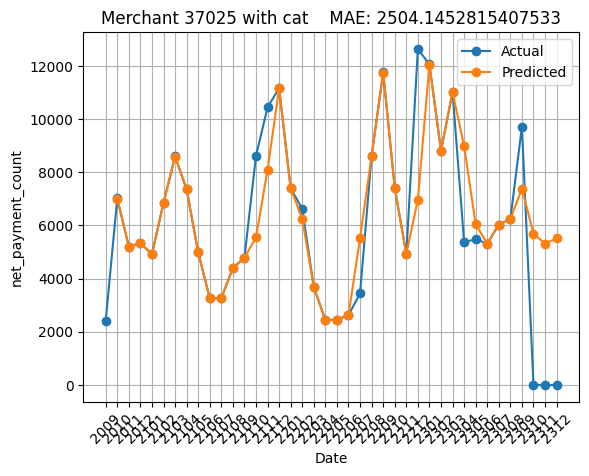

In [43]:
result, mae = perform_regression(37025, 'cat', dfWithZeros=True, plotOnlyLastThree=False)

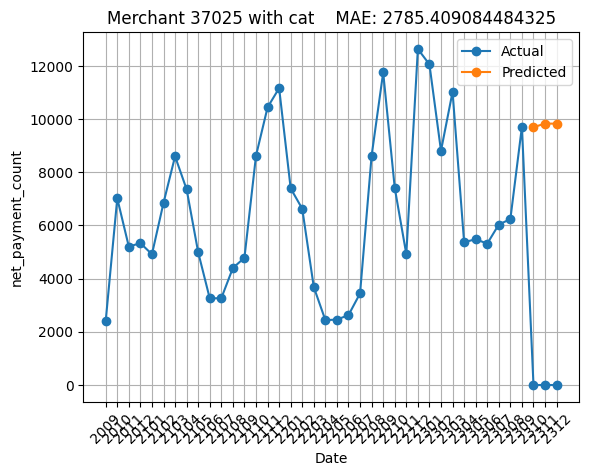

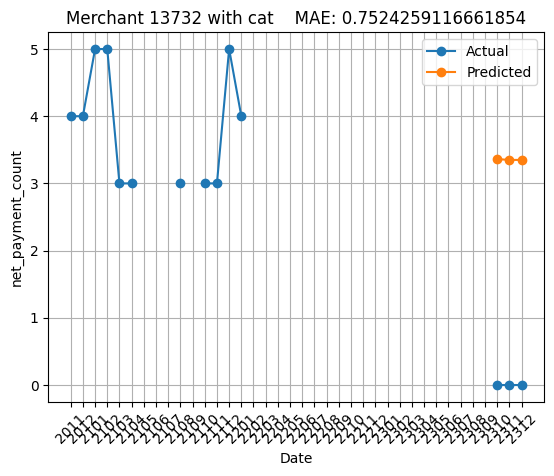

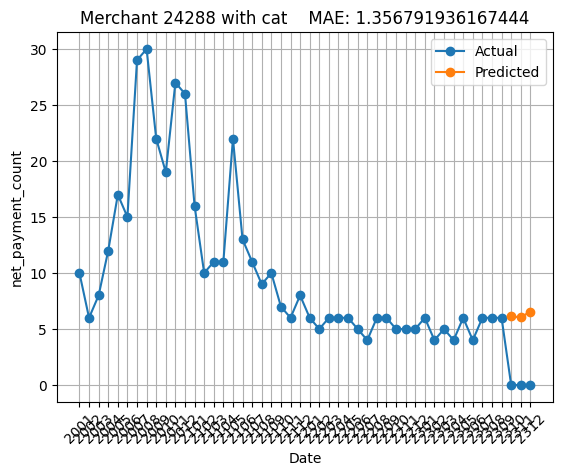

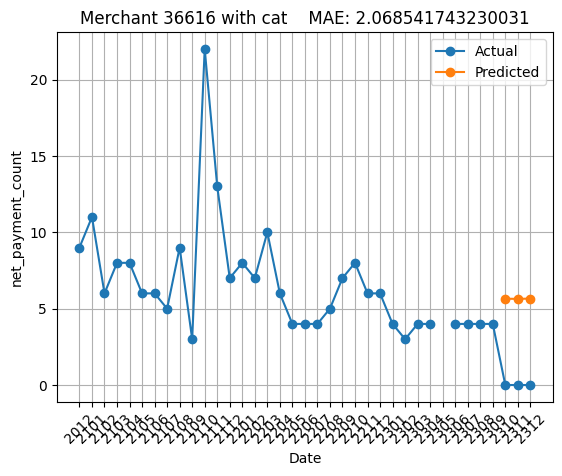

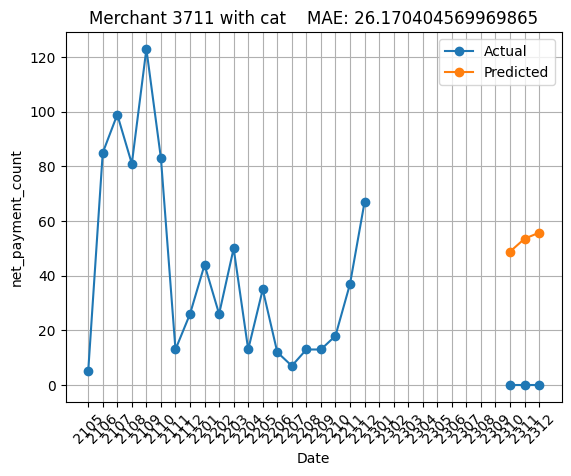

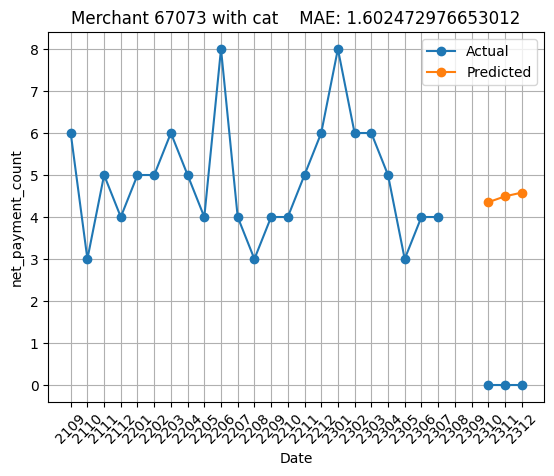

In [49]:
for id in merchant_ids[915:930]:
  if len(get_merchant_df(id)) < 10:
    continue
  else:
    result, mae = perform_regression(id, 'cat', dfWithZeros=False)
